In [ ]:
from sklearn import metrics
import scikitplot as skplt
import preprocess
import fine_tunned_bert

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import tensorflow as tf 
from sklearn.metrics import confusion_matrix


In [3]:
df= pd.read_csv('data/persuasion_dataset.csv') 
df.shape

(13114, 2)

In [8]:
bert_model_name='small_bert/bert_en_uncased_L-4_H-512_A-8'

In [9]:
# build test and training datasets 
train_data, val_data, test_data = preprocess.eval_train_split(df['text_lemmatized'], df['label'] , test_size = 0.2, validation = True)
cleaned_train, y_train,cleaned_val, y_val, cleaned_test, y_test = train_data[0], train_data[1],val_data[0], val_data[1], test_data[0], test_data[1]


In [11]:
train_data = tf.data.Dataset.from_tensor_slices(  (cleaned_train,y_train) ).batch(32)
val_data = tf.data.Dataset.from_tensor_slices( (cleaned_val,y_val) ).batch(32)
test_data = tf.data.Dataset.from_tensor_slices( (cleaned_test,y_test) ).batch(32)
# create the fine_tunned_model
bert_model = fine_tunned_bert.create_fine_tunned_bert(train_data,bert_model_name=bert_model_name)
# training the model
history = bert_model.fit(x=train_data,epochs =5,validation_data = val_data,verbose=False)
# evaluation 
scores = bert_model.evaluate(test_data)
print("-----------------------------------------")
predictions=bert_model.predict(cleaned_test)
results = (predictions>0.5)*1
tn, fp, fn, tp = confusion_matrix(y_test,results).ravel()
print("Fold cofusion matrix")
print((tn, fp, fn, tp))
print("-----------------------------------------")


82/82 [==============================] - 8s 100ms/step - loss: 0.2131 - accuracy: 0.9527 - precision_1: 0.9568 - recall_1: 0.9481 - auc_1: 0.9787
-----------------------------------------
82/82 [==============================] - 8s 95ms/step
Fold cofusion matrix
(1258, 56, 68, 1241)
-----------------------------------------


In [12]:
# model evaluation 
scores = bert_model.evaluate(test_data)
print("Accuracy: %.2f%%" % (scores[1]*100))

82/82 [==============================] - 8s 100ms/step - loss: 0.2131 - accuracy: 0.9527 - precision_1: 0.9568 - recall_1: 0.9481 - auc_1: 0.9787
Accuracy: 95.27%


In [14]:

print(metrics.classification_report(y_test, results, target_names=[ 'non persuasive', 'persuasion']))

               precision    recall  f1-score   support

no-persuasion       0.95      0.96      0.95      1314
   persuasion       0.96      0.95      0.95      1309

     accuracy                           0.95      2623
    macro avg       0.95      0.95      0.95      2623
 weighted avg       0.95      0.95      0.95      2623



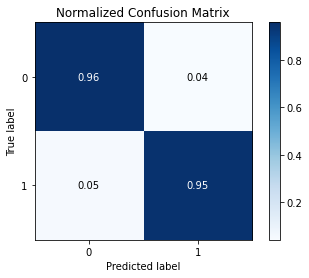

In [15]:
skplt.metrics.plot_confusion_matrix(y_test, results , normalize=True)
plt.show()

In [16]:
save = pd.read_csv('data/sample_persuasion_cleaned.csv')
test_data = tf.data.Dataset.from_tensor_slices( (save['text_lemmatized'],save['label']) ).batch(32)
# model evaluation 
scores = bert_model.evaluate(test_data)
print(scores)

10/10 [==============================] - 1s 103ms/step - loss: 1.1368 - accuracy: 0.7680 - precision_1: 0.7865 - recall_1: 0.9251 - auc_1: 0.7842
[1.1367892026901245, 0.7680251002311707, 0.7865168452262878, 0.9251101613044739, 0.7841649055480957]


In [17]:
predictions=bert_model.predict(save['text_lemmatized'])
results = (predictions>0.5)*1
print(metrics.classification_report(save['label'], results, target_names=[ 'no-persuasion', 'persuasion']))

10/10 [==============================] - 1s 101ms/step
               precision    recall  f1-score   support

no-persuasion       0.67      0.38      0.49        92
   persuasion       0.79      0.93      0.85       227

     accuracy                           0.77       319
    macro avg       0.73      0.65      0.67       319
 weighted avg       0.75      0.77      0.75       319



10/10 [==============================] - 1s 104ms/step
confusion matrix:
[[ 35  57]
 [ 17 210]]



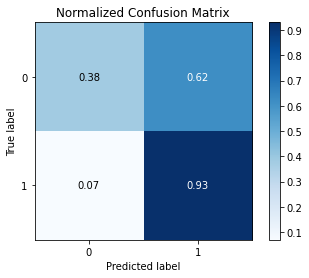

In [18]:

pred_ =  bert_model.predict(save['text_lemmatized'])
save['predicted'] = [1 if prob > 0.5 else 0 for prob in pred_]

print("confusion matrix:")
print(metrics.confusion_matrix(save['label'], save['predicted']))
print()

skplt.metrics.plot_confusion_matrix(save['label'], save['predicted'], normalize=True)
plt.show()